In [26]:

import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics


from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import cross_val_predict


In [27]:
df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

In [28]:
df_female=df.loc[df['gender'] == "Female"]

In [29]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 5442
Data columns (total 81 columns):
iid         2999 non-null int64
id          2999 non-null float64
gender      2999 non-null object
idg         2999 non-null int64
condtn      2999 non-null int64
wave        2999 non-null int64
round       2999 non-null int64
position    2999 non-null int64
order       2999 non-null int64
partner     2999 non-null int64
pid         2999 non-null float64
match       2999 non-null int64
int_corr    2999 non-null float64
samerace    2999 non-null int64
age_o       2999 non-null float64
race_o      2999 non-null object
pf_o_att    2999 non-null float64
pf_o_sin    2999 non-null float64
pf_o_int    2999 non-null float64
pf_o_fun    2999 non-null float64
pf_o_amb    2999 non-null float64
pf_o_sha    2999 non-null float64
dec_o       2999 non-null int64
attr_o      2999 non-null float64
sinc_o      2999 non-null float64
intel_o     2999 non-null float64
fun_o       2999 non-null float64

In [30]:
df_f1=df_female.iloc[:,16:22]
df_f1.head()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
0,35.0,20.0,20.0,20.0,0.0,5.0
1,60.0,0.0,0.0,40.0,0.0,0.0
2,30.0,5.0,15.0,40.0,5.0,5.0
3,30.0,10.0,20.0,10.0,10.0,20.0
4,50.0,0.0,30.0,10.0,0.0,10.0


In [31]:
df_f2=df_female.iloc[:,23:33]
df_f2.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age
0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0
1,6.0,5.0,10.0,6.0,6.0,5.0,6.0,3.0,1.0,23.0
2,7.0,7.0,7.0,9.0,9.0,9.0,8.0,10.0,1.0,23.0
3,8.0,8.0,9.0,8.0,8.0,9.0,9.0,7.0,2.0,23.0
4,6.0,6.0,7.0,7.0,8.0,7.0,6.0,6.0,2.0,23.0


In [32]:
df_f3=df_female.iloc[:,40:43]
df_f3.head()

,goal,date,go_out
0,1.0,5.0,1.0
1,1.0,5.0,1.0
2,1.0,5.0,1.0
3,1.0,5.0,1.0
4,1.0,5.0,1.0


In [33]:
df_f4=df_female.iloc[:,45:80]
df_f4.head()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,...,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0
1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,...,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0
2,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,...,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0
3,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,...,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0
4,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,...,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0


In [34]:
df_female_cont=pd.concat([df_f1,df_f2,df_f3,df_f4, df_female['age_o'],df_female['imprace'], df_female['round'],df_female['imprelig'] ],axis=1)


In [35]:
from sklearn.preprocessing import StandardScaler
x=df_female_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_female_cont.columns)
df_stand.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 58 columns):
pf_o_att    2999 non-null float64
pf_o_sin    2999 non-null float64
pf_o_int    2999 non-null float64
pf_o_fun    2999 non-null float64
pf_o_amb    2999 non-null float64
pf_o_sha    2999 non-null float64
attr_o      2999 non-null float64
sinc_o      2999 non-null float64
intel_o     2999 non-null float64
fun_o       2999 non-null float64
amb_o       2999 non-null float64
shar_o      2999 non-null float64
like_o      2999 non-null float64
prob_o      2999 non-null float64
met_o       2999 non-null float64
age         2999 non-null float64
goal        2999 non-null float64
date        2999 non-null float64
go_out      2999 non-null float64
sports      2999 non-null float64
tvsports    2999 non-null float64
exercise    2999 non-null float64
dining      2999 non-null float64
museums     2999 non-null float64
art         2999 non-null float64
hiking      2999 non-null float64
gaming   

In [36]:
X_female=df_stand


In [37]:
y_female = df_female.match

y_female = y_female.map(lambda x: 'no' if x ==0 else 'yes')

len(y_female)

2999

Random Forest Score:	0.822 ± 0.009
Ada Boost Score:	0.834 ± 0.011
Gradient Boosting Score:	0.842 ± 0.007
Decision Tree Score:	0.745 ± 0.025


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
like_o,0.082103,0.10,0.066919,0.106945
prob_o,0.066325,0.04,0.052379,0.033644
pf_o_att,0.054650,0.12,0.032244,0.022616
pf_o_fun,0.048580,0.04,0.031846,0.028061
pf_o_sha,0.048363,0.04,0.031249,0.051076
pf_o_sin,0.046124,0.06,0.038416,0.033157
attr_o,0.044892,0.06,0.023539,0.018243
intel1_1,0.035709,0.02,0.015943,0.013634
pf_o_int,0.035339,0.02,0.031208,0.046178
shar_o,0.035215,0.00,0.034512,0.033547


None


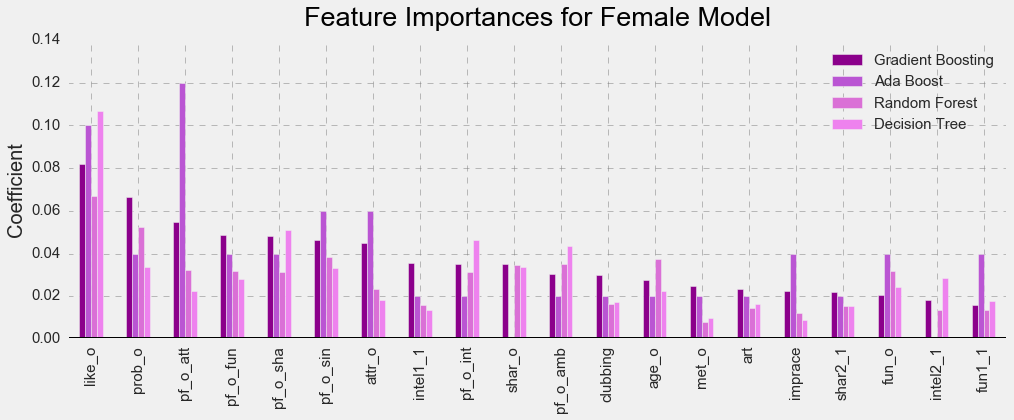

In [38]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_female, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_female, y_female, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_female, y_female)
abc.fit(X_female, y_female)
gbc.fit(X_female, y_female)
dtc.fit(X_female, y_female)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_female.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))



importances[0:20].plot(kind='bar', figsize=(15,5), color=['darkmagenta','mediumorchid','orchid','violet'])

plt.grid(color='gray', linestyle='--', alpha=.5)
plt.rcParams['axes.facecolor'] = 'gray'
plt.title('Feature Importances for Female Model', fontsize = 27, y = 1.03, color='black')

plt.grid(color='gray', linestyle='--', alpha=.5)
plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [39]:
categ_female= ['position', 'samerace','race_o','condtn','dec', 'field_cd','race','wave','career_c','order']
df_female_cat=df_female[categ_female]

len(df_female_cat)

2999

In [40]:


X = patsy.dmatrix('~ C(samerace) + C(race_o) +C(field_cd)+ C(race)+ C(wave)+C(career_c)+C(dec)+C(condtn)+C(position)+C(order)', df_female_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat
df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(samerace)[T.1],C(race_o)[T.Asian American],C(race_o)[T.European American],C(race_o)[T.Hispanic American],C(race_o)[T.Other],C(field_cd)[T.Business/Econ/Finance],C(field_cd)[T.Education],C(field_cd)[T.Engineering],C(field_cd)[T.English],...,C(order)[T.13],C(order)[T.14],C(order)[T.15],C(order)[T.16],C(order)[T.17],C(order)[T.18],C(order)[T.19],C(order)[T.20],C(order)[T.21],C(order)[T.22]
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X_female=df_cat

Random Forest Score:	0.841 ± 0.009
Ada Boost Score:	0.843 ± 0.007
Gradient Boosting Score:	0.848 ± 0.008
Decision Tree Score:	0.838 ± 0.013


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
C(dec)[T.1],0.345961,0.02,0.276670,0.353926
C(position)[T.10],0.021893,0.02,0.009957,0.017483
C(order)[T.19],0.019993,0.00,0.007948,0.008778
C(career_c)[T.Undecided],0.019317,0.00,0.007209,0.008310
C(race_o)[T.European American],0.018598,0.00,0.018270,0.006332
C(wave)[T.15],0.018079,0.00,0.005917,0.008498
C(order)[T.4],0.017431,0.02,0.018358,0.019058
C(field_cd)[T.Medical Science],0.017258,0.04,0.005695,0.008317
C(field_cd)[T.Engineering],0.017223,0.02,0.003840,0.003324
C(position)[T.6],0.017201,0.02,0.010988,0.008985


None


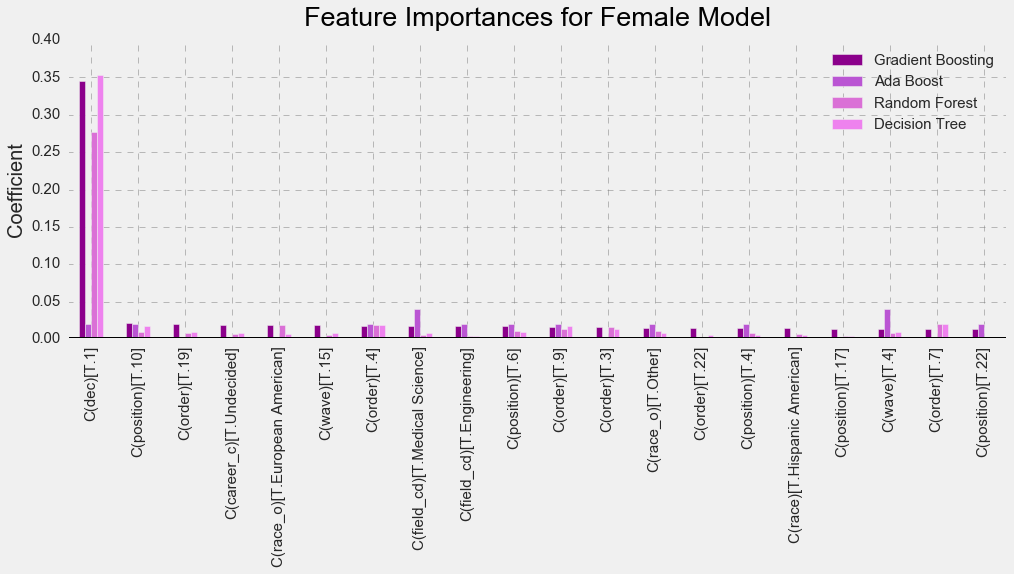

In [42]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_female, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_female, y_female, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_female, y_female)
abc.fit(X_female, y_female)
gbc.fit(X_female, y_female)
dtc.fit(X_female, y_female)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_female.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))



importances[0:20].plot(kind='bar', figsize=(15,5), color=['darkmagenta','mediumorchid','orchid','violet'])


plt.title('Feature Importances for Female Model', fontsize = 27, y = 1.03, color='black')


plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)
plt.grid(color='gray', linestyle='--', alpha=.5)
#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [43]:
cont_female=['like_o','prob_o','pf_o_att','pf_o_fun','pf_o_sha','pf_o_sin','attr_o','pf_o_int',\
            'shar_o','intel1_1','pf_o_amb','age_o','clubbing','met_o','art','imprace','intel2_1',\
            'fun_o','shar2_1','attr1_1','concerts','fun1_1','gaming','music','amb_o','exphappy',\
            'exercise','age','fun2_1','round']
df_female_cont=df_female[cont_female]

len(df_female_cont)

2999

In [44]:
from sklearn.preprocessing import StandardScaler
x=df_female_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_female_cont.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 30 columns):
like_o      2999 non-null float64
prob_o      2999 non-null float64
pf_o_att    2999 non-null float64
pf_o_fun    2999 non-null float64
pf_o_sha    2999 non-null float64
pf_o_sin    2999 non-null float64
attr_o      2999 non-null float64
pf_o_int    2999 non-null float64
shar_o      2999 non-null float64
intel1_1    2999 non-null float64
pf_o_amb    2999 non-null float64
age_o       2999 non-null float64
clubbing    2999 non-null float64
met_o       2999 non-null float64
art         2999 non-null float64
imprace     2999 non-null float64
intel2_1    2999 non-null float64
fun_o       2999 non-null float64
shar2_1     2999 non-null float64
attr1_1     2999 non-null float64
concerts    2999 non-null float64
fun1_1      2999 non-null float64
gaming      2999 non-null float64
music       2999 non-null float64
amb_o       2999 non-null float64
exphappy    2999 non-null float64
exercise 

In [45]:
categ_female= ['dec','field_cd','race','position','order']
df_female_cat=df_female[categ_female]

len(df_female_cat)



2999

In [46]:
X = patsy.dmatrix('~ C(field_cd)+ C(race)+C(dec)+C(order)+C(position)', df_female_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat
df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(field_cd)[T.Business/Econ/Finance],C(field_cd)[T.Education],C(field_cd)[T.Engineering],C(field_cd)[T.English],C(field_cd)[T.Film],C(field_cd)[T.Fine Arts/Arts Admin],C(field_cd)[T.History/Religion/Philosophy],C(field_cd)[T.Languages],C(field_cd)[T.Law],...,C(position)[T.13],C(position)[T.14],C(position)[T.15],C(position)[T.16],C(position)[T.17],C(position)[T.18],C(position)[T.19],C(position)[T.20],C(position)[T.21],C(position)[T.22]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_female_final = pd.concat([df_cat, df_stand], axis=1)

X_female=df_female_final

len(X_female)

2999

In [48]:
y_female = df_female.match

y_female = y_female.map(lambda x: 'no' if x ==0 else 'yes')

len(y_female)

2999

Random Forest Score:	0.885 ± 0.009
Ada Boost Score:	0.911 ± 0.016
Gradient Boosting Score:	0.923 ± 0.014
Decision Tree Score:	0.893 ± 0.008


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
C(dec)[T.1],0.235165,0.02,0.277208,0.353926
pf_o_att,0.079120,0.08,0.021589,0.017374
attr_o,0.062311,0.10,0.050007,0.070772
shar_o,0.051031,0.02,0.029949,0.026131
like_o,0.050271,0.10,0.049792,0.193311
pf_o_sha,0.048445,0.06,0.024652,0.022367
prob_o,0.040504,0.04,0.035418,0.015150
pf_o_fun,0.037008,0.06,0.023438,0.015535
pf_o_sin,0.034462,0.06,0.020607,0.026114
pf_o_int,0.030507,0.02,0.024237,0.019990


None


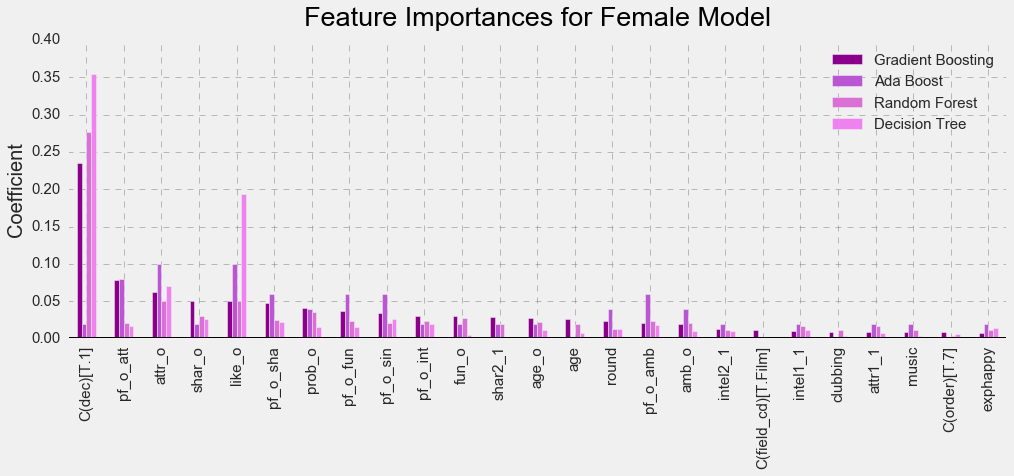

In [49]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_female, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_female, y_female, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_female, y_female)
abc.fit(X_female, y_female)
gbc.fit(X_female, y_female)
dtc.fit(X_female, y_female)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_female.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(40))

importances[0:25].plot(kind='bar', figsize=(15,5), color=['darkmagenta','mediumorchid','orchid','violet'])


plt.title('Feature Importances for Female Model', fontsize = 27, y = 1.03, color='black')


plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)
plt.grid(color='gray', linestyle='--', alpha=.5)
#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

